In [3]:
import re                         # For regular expression operations
import numpy as np                # Numerical computations
import pandas as pd               # Data manipulation and analysis
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns             # Statistical data visualization
# Data preprocessing and splitting
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Scales features and encodes target labels
# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer  # Converts text sequences to numerical features (e.g., k-mers)
# Model
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for classification tasks
# Evaluation metrics
from sklearn.metrics import (
    classification_report,   # Generates a detailed classification performance report
    accuracy_score,          # Computes accuracy of the model
    confusion_matrix         # Confusion matrix to evaluate classification errors
)


#HVR2

Generating K-mer features...

Random Forest Model Performance:
Training Accuracy: 0.9250
Test Accuracy: 0.7833
Accuracy Gap: 0.1417

Classification Report (Training Set):
              precision    recall  f1-score   support

     burkina       1.00      1.00      1.00        40
       india       1.00      1.00      1.00        40
       japan       0.91      0.78      0.84        40
       kenya       1.00      1.00      1.00        40
      russia       1.00      0.85      0.92        40
       spain       0.71      0.93      0.80        40

    accuracy                           0.93       240
   macro avg       0.94      0.92      0.93       240
weighted avg       0.94      0.93      0.93       240


Classification Report (Test Set):
              precision    recall  f1-score   support

     burkina       1.00      1.00      1.00        10
       india       1.00      1.00      1.00        10
       japan       0.50      0.50      0.50        10
       kenya       1.00      1.00 

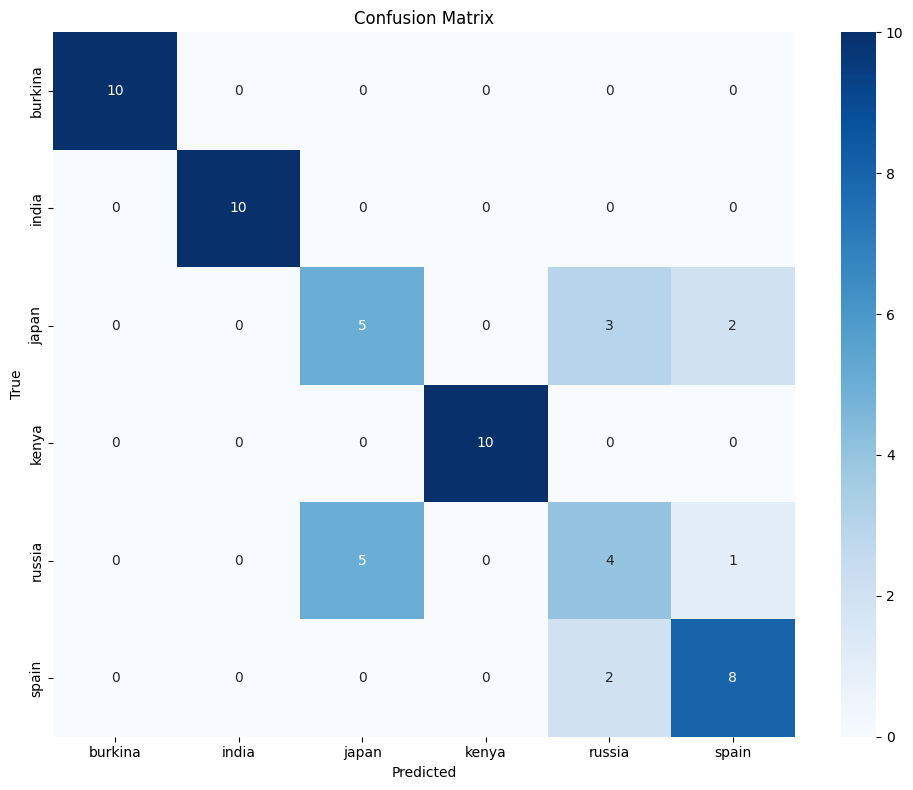


Training and evaluation complete!
Final model test accuracy: 0.7833


In [4]:
# Load Dataset
df = pd.read_csv('hvr2_cleaned_sequences.csv')

# Apply regex to remove all digits from the geo_loc column
df['geo_loc'] = df['geo_loc'].apply(lambda x: re.sub(r'\d+', '', x))

# Select Features and Target
X = df['HVR2']  # Only using HVR2 sequences
y = df['geo_loc']  # Geographic location as the target variable

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def generate_kmer_features(sequences, k=7):
    """ Convert sequences into k-mer frequency features using CountVectorizer. """
    sequences_list = sequences.tolist()
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(k, k))
    kmer_features = vectorizer.fit_transform(sequences_list)
    return kmer_features, vectorizer

# K-mer Encoding
print("Generating K-mer features...")
X_train_kmer, kmer_vectorizer = generate_kmer_features(X_train)

# Feature Scaling
scaler_kmer = StandardScaler(with_mean=False)  # Preserve sparsity
X_train_kmer_scaled = scaler_kmer.fit_transform(X_train_kmer)

# Convert sparse matrix to dense for training
X_train_selected = X_train_kmer_scaled.toarray()

# Apply transformations to test data
X_test_kmer = kmer_vectorizer.transform(X_test.astype(str))
X_test_kmer_scaled = scaler_kmer.transform(X_test_kmer)
X_test_selected = X_test_kmer_scaled.toarray()

# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train_encoded)

# Predict on training and test sets
y_train_pred = rf_model.predict(X_train_selected)
y_test_pred = rf_model.predict(X_test_selected)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
accuracy_gap = train_accuracy - test_accuracy

# Print results
print("\nRandom Forest Model Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Accuracy Gap: {accuracy_gap:.4f}")

# Print classification reports
print("\nClassification Report (Training Set):")
print(classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_))

print("\nClassification Report (Test Set):")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

print("\nTraining and evaluation complete!")
print(f"Final model test accuracy: {test_accuracy:.4f}")


# Combined

Generating K-mer features...

Random Forest Model Performance:
Training Accuracy: 1.0000
Test Accuracy: 0.9000
Accuracy Gap: 0.1000

Classification Report (Training Set):
              precision    recall  f1-score   support

     burkina       1.00      1.00      1.00        40
       india       1.00      1.00      1.00        40
       japan       1.00      1.00      1.00        40
       kenya       1.00      1.00      1.00        40
      russia       1.00      1.00      1.00        40
       spain       1.00      1.00      1.00        40

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240


Classification Report (Test Set):
              precision    recall  f1-score   support

     burkina       1.00      1.00      1.00        10
       india       1.00      1.00      1.00        10
       japan       0.86      0.60      0.71        10
       kenya       1.00      1.00 

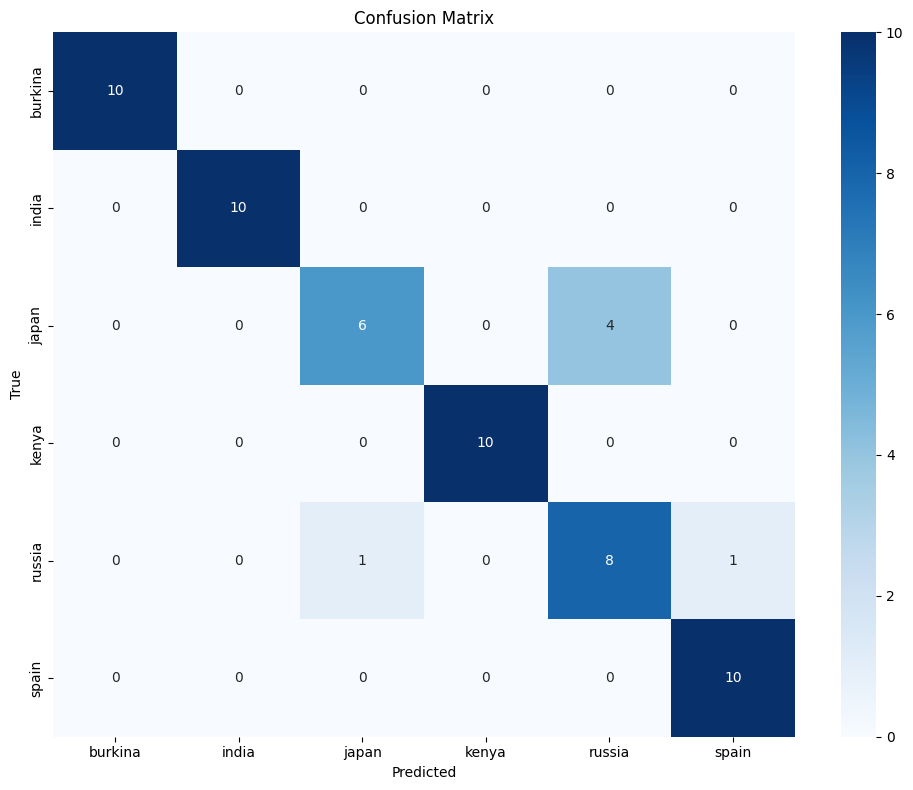


Training and evaluation complete!
Final model test accuracy: 0.9000


In [5]:
# Load Dataset
df = pd.read_csv('hvr1_hvr2_cleaned_sequences.csv')

# Apply regex to remove all digits from the geo_loc column
df['geo_loc'] = df['geo_loc'].apply(lambda x: re.sub(r'\d+', '', x))

# Concatenate HVR1 and HVR2 into a single sequence
df['combined'] = df['HVR1'] + df['HVR2']  # Concatenate HVR1 and HVR2 sequences

# Select Features and Target
X = df['combined']  # Use concatenated HVR1 and HVR2 sequences
y = df['geo_loc']  # Geographic location as the target variable

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def generate_kmer_features(sequences, k=7):
    """ Convert sequences into k-mer frequency features using CountVectorizer. """
    sequences_list = sequences.tolist()
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(k, k))
    kmer_features = vectorizer.fit_transform(sequences_list)
    return kmer_features, vectorizer

# K-mer Encoding
print("Generating K-mer features...")
X_train_kmer, kmer_vectorizer = generate_kmer_features(X_train)

# Feature Scaling
scaler_kmer = StandardScaler(with_mean=False)  # Preserve sparsity
X_train_kmer_scaled = scaler_kmer.fit_transform(X_train_kmer)

# Convert sparse matrix to dense for training
X_train_selected = X_train_kmer_scaled.toarray()

# Apply transformations to test data
X_test_kmer = kmer_vectorizer.transform(X_test.astype(str))
X_test_kmer_scaled = scaler_kmer.transform(X_test_kmer)
X_test_selected = X_test_kmer_scaled.toarray()

# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train_encoded)

# Predict on training and test sets
y_train_pred = rf_model.predict(X_train_selected)
y_test_pred = rf_model.predict(X_test_selected)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
accuracy_gap = train_accuracy - test_accuracy

# Print results
print("\nRandom Forest Model Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Accuracy Gap: {accuracy_gap:.4f}")

# Print classification reports
print("\nClassification Report (Training Set):")
print(classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_))

print("\nClassification Report (Test Set):")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

print("\nTraining and evaluation complete!")
print(f"Final model test accuracy: {test_accuracy:.4f}")
